<a href="https://colab.research.google.com/github/BKN1810/Machine-Learning/blob/master/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'category']
# load dataset
data = pd.read_csv("/content/sample_data/pima-indians-diabetes.csv", header=None, names=column_names)

print(" data.shape: ", data.shape )
print(data.head())  # display top 5 rows

#split dataset in features and target variable
feature_columns = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_columns]         # Features
y = data.category                # Target variable

 data.shape:  (768, 9)
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  category
0         6      148  72    35        0  33.6     0.627   50         1
1         1       85  66    29        0  26.6     0.351   31         0
2         8      183  64     0        0  23.3     0.672   32         1
3         1       89  66    23       94  28.1     0.167   21         0
4         0      137  40    35      168  43.1     2.288   33         1


In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [4]:
logregression=LogisticRegression()

# Train the logistic regression model
logregression=logregression.fit(X_train,y_train)

# predict the response of test dataset
y_pred=logregression.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cnf_matrix=confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
[[89 10]
 [25 30]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



Text(0.5, 257.44, 'Predicted label')

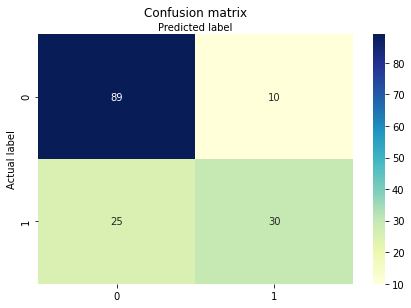

In [7]:
# Visualizing Confusion Matrix 
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')